# Fast Fourier Transform operation with pyclesperanto

This notebook display the usage of `fft` and `ifft` in pyclesperanto. As it is still a WIP, functions, parameters and usage may still change.

In [1]:
import pyclesperanto as cle
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.230.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Applying FFT and iFFT to an array

In [2]:
arr = cle.push(np.asarray( 
    [
        [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
        [11,12,13,14,15,16,17,18,19,20],
        [21,22,23,24,25,26,27,28,29,30],
        [31,32,33,34,35,36,37,38,39,70],
        [41,42,43,44,45,46,47,48,49,50]
    ]
).astype(np.float32))
arr

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
       [31., 32., 33., 34., 35., 36., 37., 38., 39., 70.],
       [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]], dtype=float32, mtype=buffer)

we call the `fft` operation which take a real array as input and will return the fft output as an Hermitian Complex buffer.

In [3]:
fft_arr = cle.__experimental__.cl_fft(arr, None)
fft_arr

array([[ 1.3050000e+03,  0.0000000e+00, -7.2948933e-01,  9.4575645e+01,
        -1.5729488e+01,  6.2941242e+01, -3.4270512e+01,  4.6695259e+01,
        -4.9270508e+01,  2.5756550e+01, -5.5000000e+01,  0.0000000e+00],
       [-2.7427051e+02,  3.6172903e+02, -3.0000002e+01, -2.3192670e-06,
        -2.4270510e+01, -1.7633558e+01, -9.2705059e+00, -2.8531693e+01,
         9.2705097e+00, -2.8531698e+01,  2.4270510e+01, -1.7633556e+01],
       [-2.4072949e+02,  5.2698219e+01,  2.4270510e+01, -1.7633558e+01,
         3.0000000e+01,  1.4565600e-06,  2.4270506e+01,  1.7633554e+01,
         9.2705135e+00,  2.8531700e+01, -9.2705097e+00,  2.8531696e+01],
       [-2.4072949e+02, -5.2698219e+01, -9.2705078e+00,  2.8531696e+01,
        -2.4270508e+01,  1.7633556e+01, -2.9999998e+01,  8.6715681e-07,
        -2.4270514e+01, -1.7633560e+01, -9.2705097e+00, -2.8531696e+01],
       [-2.7427051e+02, -3.6172903e+02, -9.2705069e+00, -2.8531698e+01,
         9.2705069e+00, -2.8531694e+01,  2.4270510e+01, -1.7633556e+01,
         3.0000002e+01,  5.4175598e-07,  2.4270510e+01,  1.7633556e+01]],
      dtype=float32, mtype=buffer)

We can transform back the complexe buffer into a real array using the `ifft` function. Here, because we do not have the precise dimension of the real buffer output, an empty output buffer must be provided to the function. In this example, it is the same size buffer provided to the `fft` at the start of this notebook.

In [4]:
new_arr = cle.create_like(arr)
cle.__experimental__.cl_ifft(fft_arr, new_arr)
new_arr

array([[ 1.0000002,  1.9999998,  3.0000005,  3.9999993,  5.       ,
         6.       ,  7.       ,  8.       ,  8.999999 , 10.       ],
       [11.       , 12.       , 13.       , 14.       , 15.       ,
        16.       , 17.       , 18.       , 19.       , 20.       ],
       [20.999996 , 21.999996 , 22.999996 , 23.999996 , 24.999996 ,
        25.999996 , 26.999996 , 27.999996 , 28.999996 , 29.999996 ],
       [31.       , 32.000004 , 33.       , 34.       , 35.000004 ,
        36.       , 37.000004 , 38.       , 39.       , 70.       ],
       [41.       , 42.       , 43.       , 44.       , 45.       ,
        46.       , 47.       , 48.       , 49.       , 50.       ]],
      dtype=float32, mtype=buffer)

We manage to retrieve the original array, with some approximation errors, possibly due to `single precision` approximation. 

Applying the same operation using numpy for verification with single and double precision. We can see with sinple precision that we also have some approximation (although less) which disapear using double precision.

In [5]:
np.fft.ifft2(np.fft.fft2(arr)).real  # single precision

array([[ 1.       ,  2.       ,  3.       ,  3.9999993,  5.       ,
         6.       ,  7.       ,  8.       ,  9.       , 10.       ],
       [11.       , 12.       , 13.       , 14.       , 15.       ,
        16.000002 , 17.       , 18.000002 , 19.       , 20.       ],
       [21.       , 22.       , 23.       , 24.000002 , 25.       ,
        26.       , 27.       , 28.       , 29.       , 30.000004 ],
       [31.       , 32.       , 33.       , 34.       , 35.       ,
        36.       , 37.       , 38.       , 39.       , 70.       ],
       [41.       , 42.       , 43.       , 44.       , 45.       ,
        46.       , 47.       , 48.       , 49.       , 50.       ]],
      dtype=float32)

In [6]:
np.fft.ifft2(np.fft.fft2(arr.get().astype(float))).real  # double precision

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
       [31., 32., 33., 34., 35., 36., 37., 38., 39., 70.],
       [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]])

## FFT on an image

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232., 232., 224.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232., 232., 232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224., 232., 232.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224., 224., 224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216., 216., 208.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200., 200., 192.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208., 200., 200.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208., 200., 192.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200., 192., 184.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200., 192., 176.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192., 184., 168.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192., 176., 160.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 152.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 144.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
  
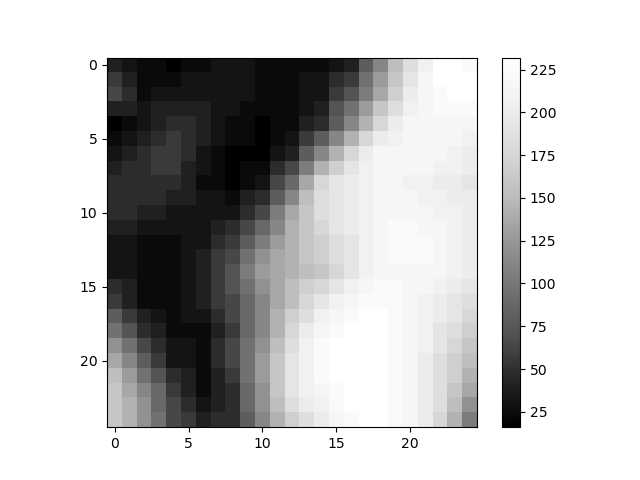
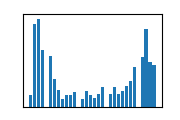

In [7]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:25])
image

array([[ 7.60480000e+04,  0.00000000e+00, -1.29348584e+03,
         2.93375371e+04, -8.78221863e+02,  5.14521289e+03,
        -1.93793994e+03,  3.02302759e+03, -1.23869189e+03,
         2.56508228e+03, -1.31883276e+03,  1.88128394e+03,
        -1.32391602e+03,  1.25985181e+03, -1.25388452e+03,
         1.03587988e+03, -1.31072961e+03,  7.99563416e+02,
        -1.39977551e+03,  4.81325256e+02, -1.26516724e+03,
         4.26673889e+02, -1.19580273e+03,  1.72608383e+02,
        -1.60755200e+03, -2.60290161e+02],
       [-3.05713013e+03,  6.94592969e+03,  3.77175952e+03,
        -6.64639893e+03,  1.03140735e+03,  2.69614185e+03,
         1.69738879e+03, -1.07301849e+02,  1.10272986e+03,
         8.70531998e+01,  1.04500867e+03,  1.59591705e+02,
         8.71523315e+02,  2.70214447e+02,  6.61044739e+02,
         2.26386307e+02,  5.83132080e+02,  4.37123779e+02,
         5.01328888e+02,  3.12425354e+02,  4.55927216e+02,
         5.31809692e+02,  5.11664001e+02,  5.35058105e+02,
         2.60004456e+02,  4.17825195e+02],
       [-1.56303015e+03,  4.55707178e+03,  1.35450867e+02,
        -3.41037842e+03,  2.69962012e+03,  3.72000049e+03,
         7.17761719e+02, -1.40168152e+01,  8.69444702e+02,
         5.29452515e+02,  4.77380127e+02,  2.19403992e+02,
         3.09488953e+02,  3.51132416e+02,  2.26143890e+02,
         4.16414062e+02,  2.19709274e+02,  3.79616882e+02,
         8.79397354e+01,  3.77513184e+02,  3.15425949e+01,
         4.27432373e+02, -4.50566101e+01,  5.05402588e+02,
        -5.54542732e+01,  2.93685730e+02],
       [-1.14972534e+03,  2.04195801e+03,  1.85235016e+02,
        -8.61049683e+02,  1.37481482e+03, -2.58160797e+02,
         5.97814453e+02,  6.78405334e+02,  1.78653351e+02,
        -2.55642090e+02,  2.16624252e+02,  1.70866364e+02,
         1.85815857e+02,  1.13690948e+01,  1.48117615e+02,
         1.67285248e+02,  1.13643456e+02,  1.70141861e+02,
         9.18585815e+01,  9.32526932e+01, -2.58205643e+01,
         9.85843430e+01,  9.34207916e+00,  1.68324463e+02,
         2.31111603e+01,  1.23628708e+02],
       [-9.77455566e+02,  1.34036035e+03,  1.13328003e+02,
        -7.84058289e+02,  5.38099976e+02,  4.55152832e+02,
         3.84958221e+02,  1.01717438e+02, -6.65837250e+01,
         1.31869492e+02,  1.44588013e+02,  9.31907501e+01,
        -4.56608582e+00,  5.14786224e+01,  9.00594635e+01,
         8.67026443e+01, -4.04692230e+01,  1.27811508e+02,
        -1.29221344e+01,  1.34333191e+02, -4.28319550e+01,
         1.31047531e+02, -6.12455139e+01,  1.23285217e+02,
        -7.17075958e+01,  5.93334236e+01],
       [-1.02144275e+03,  9.78684265e+02,  4.62332672e+02,
        -8.37723816e+02,  2.11490646e+02,  6.12128662e+02,
         2.86722351e+02,  2.37071075e+02,  1.77433212e+02,
         1.44446884e+02,  2.16656017e+01,  1.68758148e+02,
         1.94866600e+01,  7.28309402e+01, -5.18628273e+01,
         7.55867996e+01, -4.47855644e+01,  1.49851456e+02,
        -4.03394699e+01,  7.92737198e+01, -3.83343811e+01,
         1.08576469e+02, -7.62702103e+01,  1.09392586e+02,
        -8.52119446e+01,  7.27077026e+01],
       [-1.08890234e+03,  8.32305176e+02,  2.44463882e+02,
        -6.69355713e+02,  2.29903900e+02,  4.93947296e+02,
         7.43117294e+01,  3.24551636e+02,  1.51364578e+02,
         1.64044144e+02,  9.71208725e+01,  2.92954712e+02,
        -1.20639755e+02,  1.24193405e+02,  4.42659454e+01,
         1.56368607e+02, -4.96340637e+01,  1.23489037e+02,
        -2.17468529e+01,  9.45727386e+01, -1.15945921e+01,
         1.57521988e+02, -2.63085365e+01,  4.40421982e+01,
        -7.00940552e+01,  3.85006371e+01],
       [-1.00560840e+03,  7.50423462e+02,  4.43907227e+02,
        -3.83557800e+02,  2.21534241e+02,  5.67309570e+02,
         1.04533875e+02,  2.46907532e+02, -4.44742889e+01,
         1.72440063e+02,  2.65390549e+01,  1.86456070e+02,
        -1.71189041e+01,  1.01707954e+02, -7.46442108e+01,
         1.18769997e+02, -4.56126938e+01,  8.78773422e+01,
         1.86078606e+01,  1.08849518e+02,
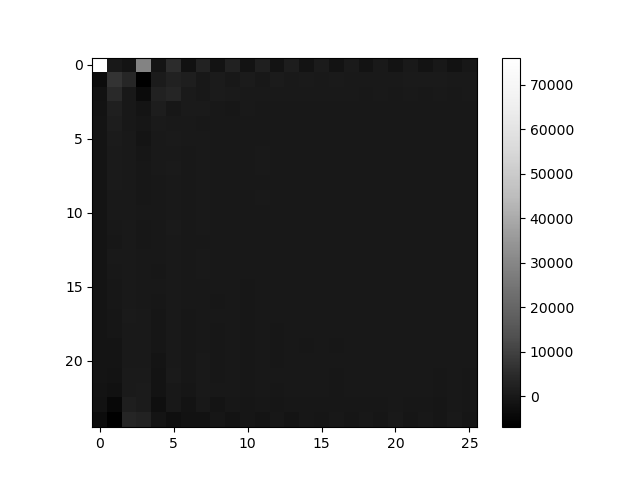
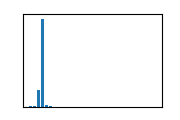

In [8]:
fft_image = cle.__experimental__.cl_fft(image, None)
fft_image

array([[ 39.999996,  31.99999 ,  24.000006,  24.00001 ,  16.000006,
         23.999975,  23.999985,  32.00001 ,  31.99999 ,  32.      ,
         23.999996,  24.000002,  23.999992,  23.999994,  23.999998,
         31.999992,  39.999996,  79.999985, 112.      , 152.00002 ,
        183.99998 , 207.99998 , 232.      , 232.      , 224.      ],
       [ 56.000004,  40.00002 ,  23.999987,  24.      ,  24.00002 ,
         32.      ,  32.00002 ,  32.000004,  31.999987,  31.999992,
         23.999983,  23.999992,  24.00001 ,  31.999996,  31.999996,
         47.999985,  55.99998 ,  96.00001 , 128.      , 159.99998 ,
        192.      , 216.      , 231.99997 , 232.00002 , 232.      ],
       [ 63.999992,  48.      ,  24.000011,  32.000004,  32.      ,
         32.000008,  32.000004,  32.      ,  32.00001 ,  32.      ,
         24.000008,  24.000002,  23.999992,  31.999996,  31.999987,
         55.99998 ,  71.99997 , 103.99997 , 135.99997 , 167.99998 ,
        199.99998 , 215.99997 , 223.99997 , 232.      , 232.00002 ],
       [ 39.999992,  40.      ,  31.999992,  40.000004,  39.999992,
         40.      ,  39.999977,  31.99999 ,  31.999987,  23.999989,
         23.999996,  23.999975,  23.999985,  31.99999 ,  39.999966,
         71.99998 ,  96.00001 , 127.999985, 159.99998 , 183.99998 ,
        207.99998 , 216.      , 224.      , 224.      , 224.      ],
       [ 15.999996,  23.999989,  32.      ,  39.999992,  48.000004,
         48.000004,  39.999985,  32.00002 ,  23.999983,  24.000008,
         16.000011,  23.999998,  23.999998,  40.000004,  48.000004,
         80.00001 , 112.00002 , 144.      , 176.00002 , 200.      ,
        216.      , 216.      , 215.99997 , 216.      , 216.      ],
       [ 23.999975,  32.000004,  40.      ,  48.000004,  55.999985,
         47.999992,  39.999996,  32.000008,  24.000002,  23.999994,
         15.999998,  23.999987,  31.999971,  55.99998 ,  79.99998 ,
        111.99996 , 143.99998 , 175.99994 , 199.99997 , 207.99997 ,
        215.99997 , 216.      , 216.      , 216.      , 208.      ],
       [ 31.999996,  40.000004,  48.000004,  56.000004,  56.000004,
         48.000008,  32.000015,  24.00001 ,  15.999989,  15.999991,
         16.00002 ,  32.000004,  40.000004,  79.99999 , 111.999985,
        143.99998 , 175.99998 , 199.99998 , 216.      , 216.      ,
        215.99997 , 216.      , 215.99997 , 208.      , 200.00003 ],
       [ 39.999985,  47.999966,  47.99996 ,  56.00001 ,  55.999973,
         39.999985,  31.999971,  23.999983,  15.999986,  23.99995 ,
         23.999977,  47.999966,  64.      , 103.99998 , 143.99995 ,
        167.99995 , 191.99994 , 207.99998 , 215.99997 , 215.99994 ,
        215.99994 , 215.99994 , 207.99998 , 208.      , 199.99998 ],
       [ 48.      ,  48.000004,  48.00001 ,  48.00001 ,  48.00003 ,
         40.00002 ,  24.00001 ,  24.000002,  15.999995,  24.000004,
         32.000004,  63.999992,  88.      , 136.      , 175.99998 ,
        191.99997 , 199.99997 , 207.99998 , 215.99997 , 215.99997 ,
        207.99998 , 207.99998 , 199.99997 , 199.99998 , 192.      ],
       [ 47.999985,  47.999992,  47.999985,  47.999985,  39.999985,
         39.99997 ,  31.99998 ,  31.999983,  23.999975,  39.99998 ,
         47.999973,  79.999985, 111.99997 , 151.99997 , 184.      ,
        191.99997 , 199.99998 , 207.99997 , 216.      , 215.99997 ,
        215.99997 , 207.99998 , 208.      , 200.      , 199.99998 ],
       [ 48.00001 ,  48.000008,  40.      ,  39.99999 ,  31.999992,
         31.999996,  31.99999 ,  32.000004,  31.99998 ,  47.99999 ,
         64.00001 , 103.999985, 136.      , 160.      , 184.      ,
        192.00002 , 200.      , 208.      , 216.00002 , 216.00002 ,
        216.00002 , 216.00002 , 208.      , 208.      , 200.      ],
       [ 39.999973,  39.99998 ,  32.      ,  31.999987,  32.00001 ,
         32.000004,  32.000004,  40.00001 ,  47.999992,  64.00001 ,
         88.00001 , 112.00001 , 144.      , 160.      , 176.00002 ,
        192.00002 , 200.      , 208.      , 2
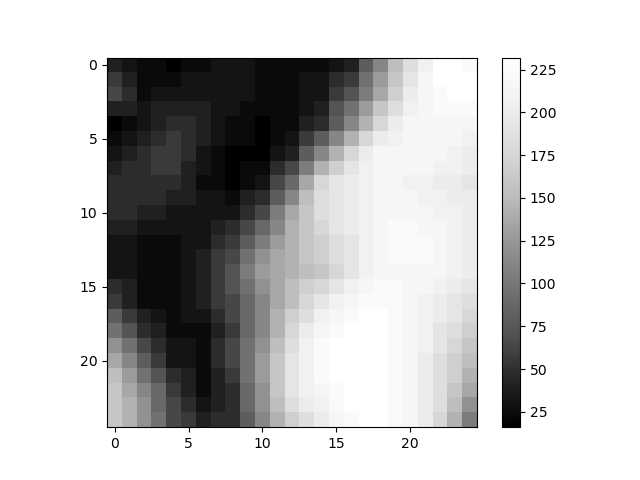
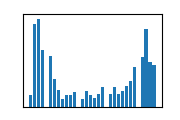

In [9]:
new_image = cle.create_like(image)
cle.__experimental__.cl_ifft(fft_image, new_image)
new_image

## Issue with specific input shape

Currently experimenting some issue related to the shape of the input. The FFT for a crop of shape (25,25) is good, same for a (25, 22), but fail if shape is (25,23) or (23,25)

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 144., 120.,  88.,  64.,  48.,  32.,  40.,  48.,  88., 120.,
        152., 184., 200., 208., 224., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 144., 120.,  96.,  64.,  56.,  40.,  48.,  48.,  80., 112.,
        144., 
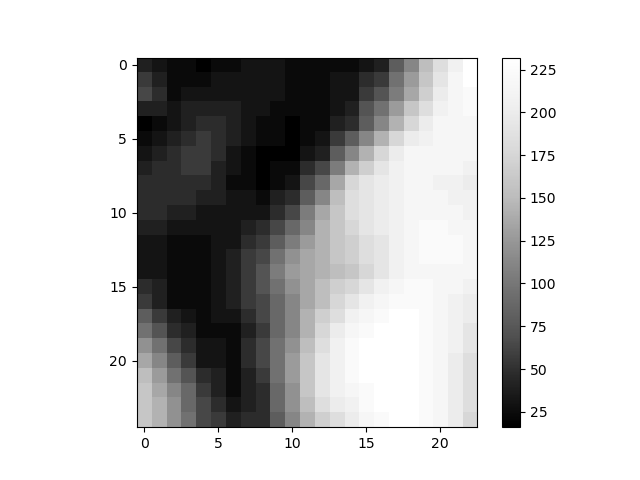
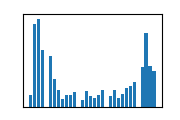

In [10]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:23])
image

array([[1.4e-45, 1.3e-44, 7.0e-45, 2.8e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 0.0e+00],
       [1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 8.4e-45, 9.8e-45, 1.4e-45, 0.0e+00, 1.4e-45,
        2.8e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00],
       [1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 1.4e-45, 0.0e+00, 5.6e-45, 1.3e-44, 0.0e+00, 0.0e+00,
        1.4e-45, 1.4e-45, 1.4e-45],
       [1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00,
        1.4e-45, 1.4e-45, 0.0e+00],
       [0.0e+00, 5.6e-45, 5.6e-45, 9.8e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00],
       [1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 1.4e-45, 1.4e-45,
        0.0e+00, 2.8e-45, 7.0e-45, 2.8e-45, 4.2e-45, 0.0e+00, 4.2e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00],
       [0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 4.2e-45,
        0.0e+00, 0.0e+00, 1.4e-45, 5.6e-45, 4.2e-45, 2.8e-45, 0.0e+00,
        2.8e-45, 2.8e-45, 0.0e+00],
       [0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 1.4e-45,
        4.2e-45, 0.0e+00, 0.0e+00],
       [4.2e-45, 1.4e-45, 4.2e-45, 2.8e-45, 0.0e+00, 2.8e-45, 2.8e-45,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45],
       [0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 7.0e-45, 0.0e+00,
        0.0e+00, 1.4e-45, 4.2e-45, 1.4e-45, 2.8e-45, 0.0e+00, 4.2e-45,
        2.8e-45, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 2.8e-45, 5.6e-45,
        0.0e+00, 0.0e+00, 1.4e-45, 4.2e-45, 1.4e-45, 1.4e-45, 0.0e+00,
        7.0e-45, 0.0e+00, 1.4e-45],
       [0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00, 1.4e-45, 2.8e-45, 0.0e+00, 4.2e-45,
        2.8e-45, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.4e-45, 2.8e-45, 4.2e-45, 0.0e+00, 7.0e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 0.0e+00],
       [1.4e-45, 1.4e-45, 1.4e-45, 0.0e+00, 4.2e-45, 4.2e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 7.0e-45, 2.8e-45, 0.0e+00, 4.2e-45,
        0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 1.4e-45, 1.4e-45, 1.4e-45, 0.0e+00, 2.8e-45, 5.6e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 7.0e-45, 4.2e-45, 0.0e+00,
        1.4e-45, 0.0e+00, 1.4e-45],
       [0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 1.4e-45, 0.0e+00, 1.4e-45, 1.4e-45, 0.0e+00, 1.4e-45,
        4.2e-45, 2.8e-45, 0.0e+00],
       [0.0e+00,
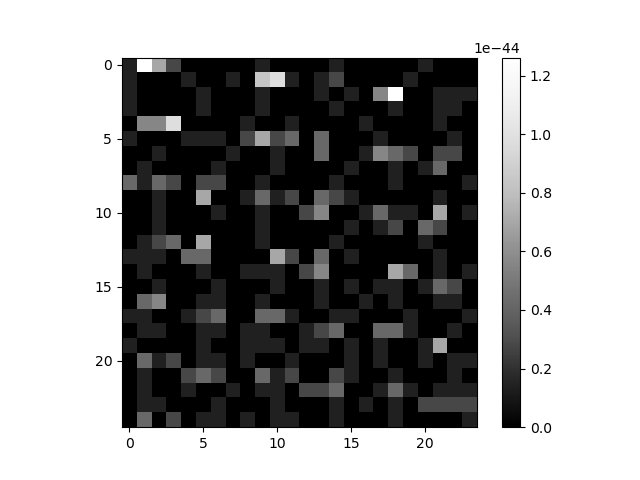
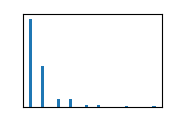

In [11]:
fft_image = cle.__experimental__.cl_fft(image, None)
fft_image

array([[2.4e-44, 0.0e+00, 0.0e+00, 5.6e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45, 2.1e-44, 0.0e+00, 0.0e+00, 8.4e-45, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.0e-44, 0.0e+00, 0.0e+00,
        1.1e-44, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 2.4e-44, 0.0e+00, 0.0e+00,
        9.8e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.4e-44,
        0.0e+00, 0.0e+00, 5.6e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.8e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.8e-44],
       [0.0e+00, 0.0e+00, 8.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 2.8e-45,
        0.0e+00, 0.0e+00, 2.8e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 2.0e-44, 0.0e+00, 0.0e+00, 5.6e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 4.2e-45, 0.0e+00, 0.0e+00, 2.8e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 1.4e-45],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 2.4e-44, 0.0e+00, 0.0e+00, 8.4e-45,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 2.0e-44, 0.0e+00, 0.0e+00, 7.0e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 4.2e-45, 0.0e+00, 0.0e+00, 2.8e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.0e-44, 0.0e+00,
        0.0e+00, 7.0e-45, 0.0e+00, 0.0e+00, 0.0e+00, 2.8e-45, 0.0e+00,
        0.0e+00, 2.8e-45],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        1.8e-44, 0.0e+00],
       [0.0e+00, 9.8e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00,
        0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        2.4e-44, 0.0e+00, 0.0e+00, 5.6e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        2.8e-45, 0.0e+00, 0.0e+00, 1.4e-45, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0
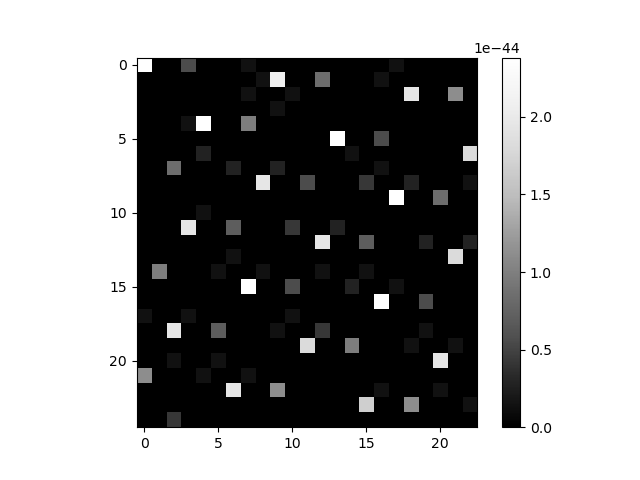
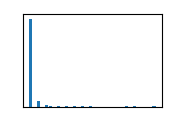

In [12]:
new_image = cle.create_like(image)
cle.__experimental__.cl_ifft(fft_image, new_image)
new_image